In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from kmodes.kmodes import KModes

In [2]:
from utils.task3_utils import *
from utils.task4_utils import *

In [4]:
dataset = 'seeds'
df, target, num_classes = load_data(name=dataset)
fi = get_frequent_itemsets(df, minsup=0.3)
df_new = make_cluster_df(df, fi)

print('Dataset:\t', dataset)
print('Num. classes:\t', num_classes)
print('Num. features:\t', df.shape[1])
print('Num. freq-itemsets:\t', fi.shape[0])

Dataset:	 seeds
Num. classes:	 3
Num. features:	 0
Num. freq-itemsets:	 0


In [ ]:
target

39     None
27     None
41     None
256    None
85     None
       ... 
105    None
274    None
240    None
335    None
67     None
Name: target, Length: 351, dtype: object

In [ ]:
estimators = [
    KModes(n_clusters=num_classes, init='Cao', verbose=1),
    SpectralClustering(n_clusters=num_classes, affinity='nearest_neighbors'),
    AgglomerativeClustering(n_clusters=num_classes)
]

estimator_names = ['KModes', 'SpectralClustering', 'AgglomerativeClustering']

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [ ]:
vc = VotingClassifier(estimators, type='hard', estimator_names=estimator_names)
ip = vc.fit_predict(df_new)
votes = vc.voting(individual_predictions=ip, num_classes=num_classes, num_samples=len(df_new))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 62987.0


ValueError: cannot convert float NaN to integer

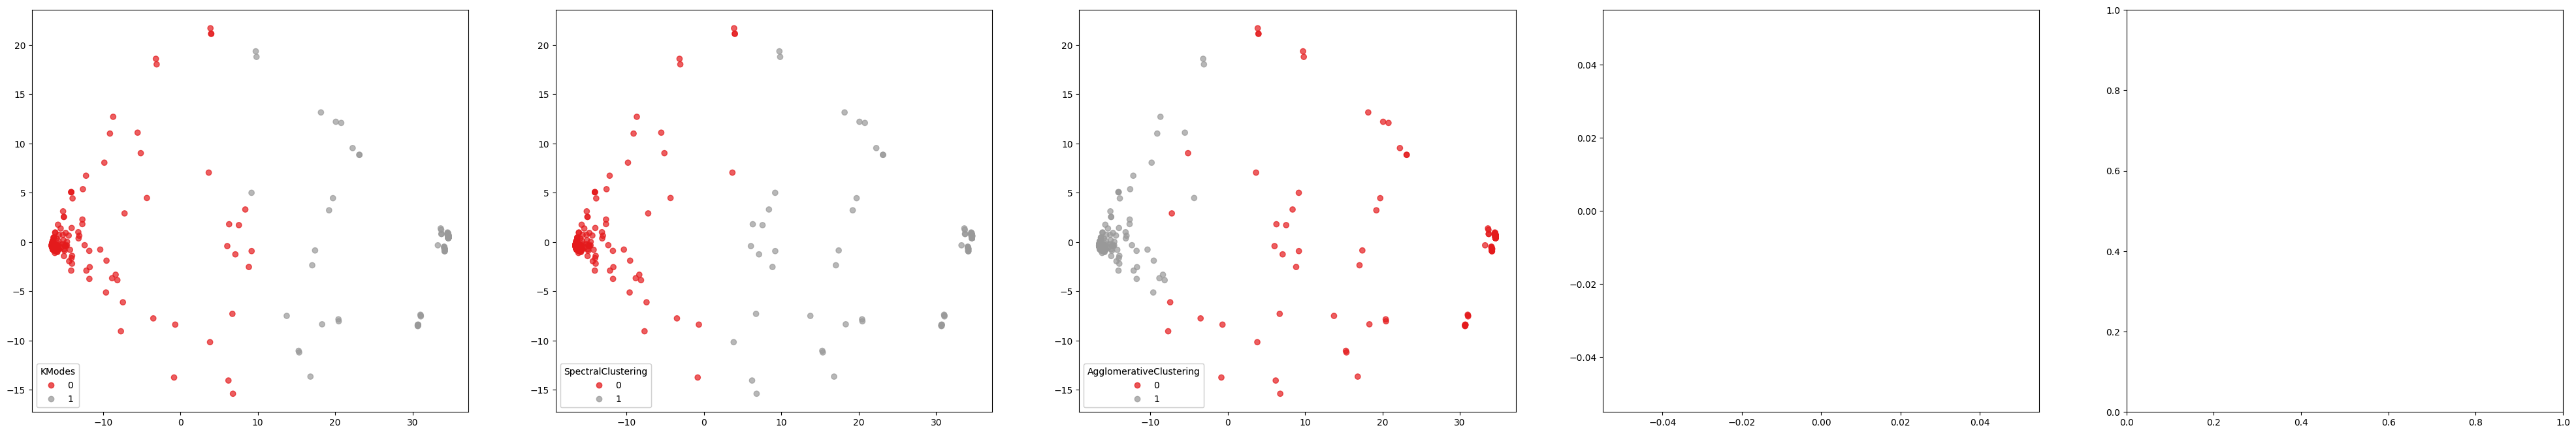

In [ ]:
plot_clusters(estimator_names, ip, votes, df_new, target)